Accuracy: 0.83
ROC AUC: 0.79


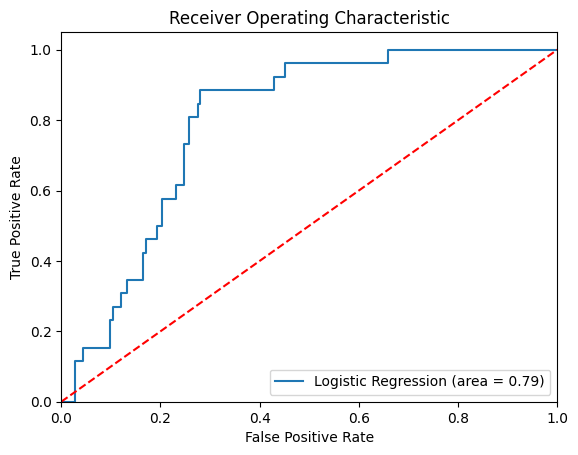

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('flying-etiquette.csv')

# Quick clean-up and handling missing values
df.fillna(method='ffill', inplace=True)  # Forward fill to handle NaNs

# Encoding categorical variables (assuming 'Do you ever recline your seat when you fly?' is the target)
categorical_features = df.select_dtypes(include=['object']).columns.drop('Do you ever recline your seat when you fly?')
numeric_features = df.select_dtypes(include=[np.number]).columns

# Setting up preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Prepare target variable
df['Do you ever recline your seat when you fly?'] = (df['Do you ever recline your seat when you fly?'] == 'Always').astype(int)

# Splitting the data
X = df.drop('Do you ever recline your seat when you fly?', axis=1)
y = df['Do you ever recline your seat when you fly?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print(f'Accuracy: {accuracy:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
